# Na aula anterior...

Qual a medida estatística usada quando usamos o KNN em um problema de classificação? E se o problema for de regressão?

Como medir a distância entre dois pontos?

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'minkowski', p = 1)

Verdadeiro ou falso? 
> Quanto maior o K no KNN, menos robusto a ruídos o modelo fica.

O que podemos fazer para utilizar dados qualitativos no KNN?

In [ ]:
Azul
Vermelho
VermelhoKNeighborsRegressor
Amarelo
Azul


Transformando em One Hot
Azul | Vermelho | Amarelo
1    | 0        | 0
0    | 1        | 0
0    | 1        | 0
0    | 0        | 1
1    | 0        | 0

In [ ]:
Azul | Vermelho | Amarelo | Verde

Azul
Vermelho
Verde
Vermelho
Amarelo
Azul


Transformando em One Hot
Azul | Vermelho | Amarelo | Verde
1    | 0        | 0       | 0
0    | 1        | 0       | 0
0    | 0        | 0       | 1
0    | 1        | 0       | 0
0    | 0        | 1       | 0
1    | 0        | 0       | 0


Transformando em Binary
F1 | F2
0  | 0 => Azul
0  | 1 => Vermelho
1  | 0 => Amarelo
1  | 1 => Verde

F1 | F2
0  | 0 => 0 - 0)
0  | 1
1  | 1
0  | 1
1  | 0
0  | 0

In [3]:
calcula_distancia((0,0), (0, 1))

1.0

In [4]:
calcula_distancia((0,1), (1, 1))

1.0

In [5]:
calcula_distancia((0,0), (1, 1))

1.4142135623730951

In [2]:
def calcula_distancia(p1, p2):
    
    if len(p1) != len(p2):
        raise Exception("O tamanho de p1 não pode ser diferente do tamanho de p2")
    
    s = 0
    for i in range(len(p1)):
        s = s + (p1[i] - p2[i])**2

    distancia = s**0.5
    
    return distancia

Para um modelo de regressão linear estar ajustado, precisamos apenas dos coeficientes (angulares e lineares). No caso de um KNN, o que é necessário?

# Hoje!

## Métricas de Avaliação de Modelos

### Acurácia

Também conhecida como taxa de acerto, essa medida de desempenho traz a proporção de acertos sobre o total de observações. Assumindo que, dado um conjunto de variáveis explicativas $x$ associados a um conjunto de variável resposta $y$ um modelo $M$ foi treinado, temos que a acurácia do modelo $M$ ($ac(M)$) pode ser descrita matematicamente como:

$$ac({M}) = \frac{1}{n}\sum_{i = 1}^{n}{I(y_{i} = M(x_i)) }$$

A taxa de acerto é um número limitado entre 0 e 1. Quanto maior for o seu valor, melhor é o modelo $M$.

De forma similar, podemos obter a taxa de erro com:

$$err({M}) = 1 - ac(M)$$

Nesse caso, quanto menor a taxa de erro, melhor o modelo $M$.


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [67]:
df = pd.read_csv('dados/iris.csv')

In [13]:
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 5)

var_expl = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
var_resp = 'species'

x_treino = df_treino[var_expl]
x_teste = df_teste[var_expl]

y_treino = df_treino[var_resp]
y_teste = df_teste[var_resp]

modelo = KNeighborsClassifier(1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict(x_teste)
accuracy_score(y_teste, y_teste_pred)

0.9

### Matriz de Confusão

Uma alternativa para visualizar o desempenho de um modelo é analisar sua matriz de confusão, a qual ilustra o número de predições corretas e incorretas para cada classe do modelo. As linhas dessa matriz representam as classes verdadeiras, enquanto as colunas representam as classes preditas pelo modelo. Logo, casa elemento $m_{ij}$ de uma matriz de confusão $M_{MC}$ apresenta o número de exemplos da classe $i$ classificados como classe $j$. Dessa forma, os elementos na diagonal principal indicam as classificações feitas de forma correta, enquanto os outros elementos são os classificados de forma incorreta.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/3960b0bd-1028-4710-8022-507110fc974a.png" style="width: 250px;"/></center>

Por meio dela, temos as medidas quantitativas de quais classes possuem maior dificuldade de serem corretamente classificadas, se existe alguma "confusão" recorrente entre duas classes e mais uma série de medidas quantitativas sobre o modelo (a ser visto mais adiante).

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 5)

var_expl = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
var_resp = 'species'

x_treino = df_treino[var_expl]
x_teste = df_teste[var_expl]

y_treino = df_treino[var_resp]
y_teste = df_teste[var_resp]

modelo = KNeighborsClassifier(1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict(x_teste)
accuracy_score(y_teste, y_teste_pred)

0.9

In [20]:
modelo.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

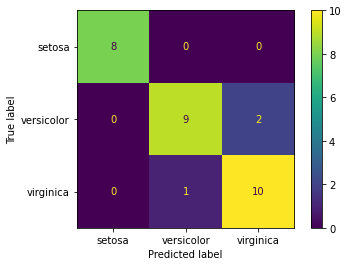

In [23]:
cf = confusion_matrix(y_teste, y_teste_pred)
cf = ConfusionMatrixDisplay(cf, display_labels = modelo.classes_)
cf.plot()

### Medidas de Desempenho Derivadas da Matriz de Confusão

Dado a matriz de confusão mostranda no item anterior, podemos extrair, entre outras, as seguintes medidas de desempenho.

#### Precisão

É a proporção de exemplos positivos classificados corretamente entre todos aqueles preditos como positivos pelo modelo $M$.

$$prec(M) = \frac{\textrm{VP}}{\textrm{VP + FP}}$$

Pode ser vista como uma medida de exatidão do modelo. Uma precisão de 1 para uma determinada classe $C_1$ significa que cada item predito como pertencene a essa classe de fato pertence ela; porém, não nos trás informações sobre as predições das classes $C_2$.

#### Sensibilidade

Taxa de acerto na classe positiva, também conhecida como revocação ou taxa de verdadeiros positivos (TVP).

$$sens(M) = \frac{\textrm{VP}}{\textrm{VP + FN}}$$


$$\textrm{TVP}(M) = sens(M)$$

Pode ser vista como uma medida de completude do modelo. Uma sensibilidade de 1 para uma determinada classe $C_1$ significa que todos os itens que deveriam ser previstos como tal, de fato foram; mas não nos trás informações sobre as outras predições erradas dentro da própria classes $C_1$.

#### Especificidade

Taxa de acerto na classe negativa, sendo o complementar a taxa de falsos positivos (TFP).

$$esp(M) = \frac{\textrm{VN}}{\textrm{VN + FP}}$$


$$\textrm{TFP}(M) = 1 - esp(M)$$

#### Generalização para problemas multiclasse

Essas medidas podem facilmente ser expandidas para problemas de classificação não binários ao considerar cada classe como positiva em relação ao conjunto das demais classes, sendo obtido um valor de desempenho para cada classe.

In [24]:
from sklearn.metrics import recall_score, precision_score

In [68]:
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 5)

var_expl = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
var_resp = 'species'

x_treino = df_treino[var_expl]
x_teste = df_teste[var_expl]

y_treino = df_treino[var_resp]
y_teste = df_teste[var_resp]

modelo = KNeighborsClassifier(1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict(x_teste)

In [37]:
modelo.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
precision_score(y_teste, y_teste_pred, average = None)

array([1.        , 0.9       , 0.83333333])

In [38]:
recall_score(y_teste, y_teste_pred, average = None)

array([1.        , 0.81818182, 0.90909091])

In [70]:
from sklearn.metrics import f1_score

In [71]:
f1_score(y_teste, y_teste_pred, average = None)

array([1.        , 0.85714286, 0.86956522])

### ROC AUC

Uma forma alternativa e comum de avaliar classificadores em problemas binários é por meio do uso das curvas ROC (*Receiving Operating Characteristics*). Seu gráfico é bidimensional, no qual o eixo X está a TFP e no Y a TVP. Na próxima figura, temos um exemplo desse tipo de análise. Se um modelo se encontra na diagonal, dizemos que ele possui comportamento similar ao lançamento de uma moeda não viciada. Modelos abaixo dessa linha são piores que o aleatório, enquanto que acima são modelos melhores que o aleatório. Se um modelo está na ponta superior esquerda, chamada de céu ROC, dizemos que é um modelo perfeito; se está na ponta superior direita ou inferior esqueda, o modelo sempre classificará novos itens como positivos ou negativos, respectivamente; se está na ponta inferior direita, chamada de inferno ROC, esse modelo estará sempre errando. Um fator importante de ser notado é que se um modelo de classificação binária está *sempre* errado, basta invertermos sua predição para que seu desempenho perfeito.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f6554123-1ee9-4838-8105-e0e32ab4c412.png" style="width: 300px;"/></center>

Apesar dessa análise gerar uma boa visualização para comparação de diferentes modelos, o processO mais usual é gerar uma curva ROC. Tomemos o seguinte exempplo: apesar da variável resposta ser binária em uma Regressão Logística, sua resposta é dado em um valor *contínuo* entre 0 e 1, que depois é aplicado um limiar de corte para definir se aquele caso pertence a classe positiva ou negativa; logo, temos um valor de TVP e TFP para cada ponto limiar, gerando assim uma curva para cada modelo de classificação, no formato das curvas na próxima figura.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f1b7f22d-1f3b-460c-b53f-7f605e5d1bc9.png" style="width: 300px;"/></center>

Quando não há interseções entre as curvas de dois modelos, signica que o modelo que possui sua curva mais próxima do céu ROC é o que oferece melhor desempenho. Ao existir cruzamentos, cada um terá um desempenho melhor que o outro de acordo com a região. Entrentao, o mais comum é trazer a **área abaixo da curva ROC (AUC-ROC)** para cada modelo e compará-los com essa medida única, que é compreendida enre 0 e 1. Valores próximos de 1 são considerados os melhores; valores próximos a 0,5 são considerados aleatórios.

In [72]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder


In [73]:
df = pd.read_csv('dados/iris.csv')
df = df[df.species != 'setosa']

In [74]:
df.species.value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

In [75]:
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 5)

var_expl = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
var_resp = 'species'

x_treino = df_treino[var_expl]
x_teste = df_teste[var_expl]

y_treino = df_treino[var_resp]
y_teste = df_teste[var_resp]

le = LabelEncoder()
le.fit(y_treino)

y_treino = le.transform(y_treino)
y_teste = le.transform(y_teste)

In [76]:
le.classes_

array(['versicolor', 'virginica'], dtype=object)

In [77]:
modelo = KNeighborsClassifier(5)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict(x_teste)

In [78]:
roc_auc_score(y_teste, y_teste_pred)

0.8901098901098902

In [79]:
y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

In [80]:
roc_auc_score(y_teste, y_teste_pred)

0.978021978021978

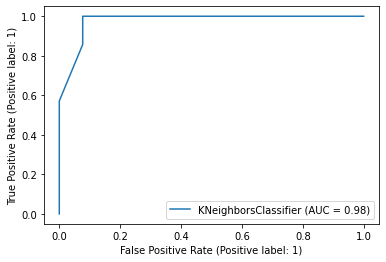

In [81]:
plot_roc_curve(modelo, x_teste, y_teste)